In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/Users/dalek/data/exoplanets.csv')

<ipython-input-2-6d3e0345410b>:1: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,117,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/dalek/data/exoplanets.csv')


In [3]:
#df[0:3261] #data below this feels really empty! 

(0.0, 8.0)

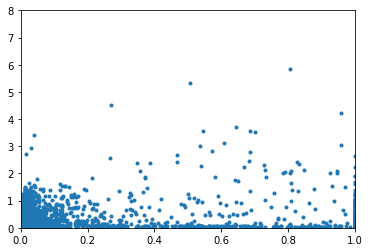

In [4]:
plt.plot(df['MASS'],df['A'],'.')
plt.xlim(0,1)
plt.ylim(0,8)

In [5]:
idx = np.where(np.isnan(df['DIST']) == True)

In [6]:
len(df['DIST']),len(idx[0]),float(len(idx[0]))/len(df['DIST'])

(5747, 3396, 0.5909170001740038)

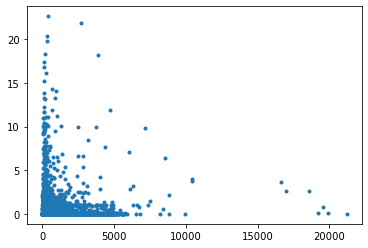

In [7]:
plt.plot(df['DIST']*3.26156,df['MASS'],'.')

In [ ]:
closest = np.where((df['DIST']*3.26156 < 12.5) & (df['DIST']*3.26156 > 0))[0]

In [ ]:
plt.plot(df['DIST'][closest],df['MASS'][closest],'.')

In [ ]:
df['MASS'][closest]

In [9]:
Lsun = 1
rmin = np.sqrt(1/1.1)
rmax = np.sqrt(1/0.53)

In [10]:
rmin, rmax

(0.9534625892455924, 1.37360563948689)

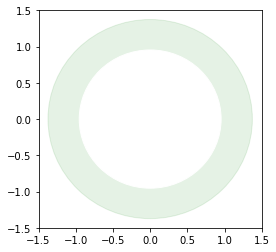

In [11]:
import matplotlib.pyplot as plt

circle2 = plt.Circle((0,0), rmax, color='g',alpha=0.1)
circle1 = plt.Circle((0, 0), rmin, color='w')

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle2)
ax.add_patch(circle1)


ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
fig.set_size_inches(4,4)

plt.show()

In [12]:
for i in range (len(df.keys())):
    print(df.keys()[i])

A
AUPPER
ALOWER
UA
AREF
AURL
AR
ARUPPER
ARLOWER
UAR
ARREF
ARURL
ASTROMETRY
B
BUPPER
BLOWER
UB
BREF
BURL
BIGOM
BIGOMUPPER
BIGOMLOWER
UBIGOM
BIGOMREF
BIGOMURL
BINARY
BINARYREF
BINARYURL
BMV
CHI2
COMP
DATE
DEC
DEC_STRING
DENSITY
DENSITYUPPER
DENSITYLOWER
UDENSITY
DENSITYREF
DENSITYURL
DEPTH
DEPTHUPPER
DEPTHLOWER
UDEPTH
DEPTHREF
DEPTHURL
DIST
DISTUPPER
DISTLOWER
UDIST
DISTREF
DISTURL
DR
DRUPPER
DRLOWER
UDR
DRREF
DRURL
DVDT
DVDTUPPER
DVDTLOWER
UDVDT
DVDTREF
DVDTURL
EANAME
EAURL
ECC
ECCUPPER
ECCLOWER
UECC
ECCREF
ECCURL
EOD
ETDNAME
ETDURL
FE
FEUPPER
FELOWER
UFE
FEREF
FEURL
FIRSTREF
FIRSTURL
FREEZE_ECC
GAMMA
GAMMAUPPER
GAMMALOWER
UGAMMA
GAMMAREF
GAMMAURL
GL
GRAVITY
GRAVITYUPPER
GRAVITYLOWER
UGRAVITY
GRAVITYREF
GRAVITYURL
H
HD
HIPP
HR
I
IUPPER
ILOWER
UI
IREF
IURL
IMAGING
J
JSNAME
EPEURL
K
KUPPER
KLOWER
UK
KREF
KURL
KOI
KS
KP
LAMBDA
LAMBDAUPPER
LAMBDALOWER
ULAMBDA
LAMBDAREF
LAMBDAURL
LOGG
LOGGUPPER
LOGGLOWER
ULOGG
LOGGREF
LOGGURL
MASS
MASSUPPER
MASSLOWER
UMASS
MASSREF
MASSURL
MICROLENSING
MSINI


In [13]:
#df[['MSTARLOWER','MSTAR','MSTARUPPER']]

In [14]:
df['TEFF'][2],df['MSTAR'][2]

(5743.0, 0.95)

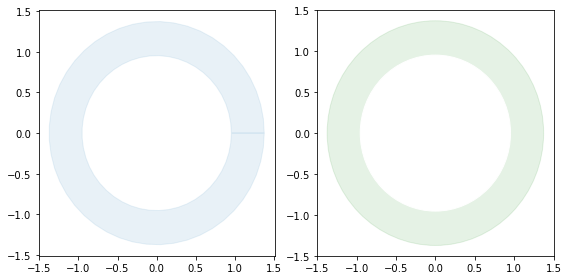

In [15]:
fig, ax  = plt.subplots(1,2)

n, radii = 50, [rmin,rmax] #[.7, .95]
theta = np.linspace(0, 2*np.pi, n, endpoint=True)
xs = np.outer(radii, np.cos(theta))
ys = np.outer(radii, np.sin(theta))
xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]

ax[0].fill(np.ravel(xs), np.ravel(ys), edgecolor='#348ABD',alpha=0.1)


circle2 = plt.Circle((0,0), rmax, color='g',alpha=0.1)
circle1 = plt.Circle((0, 0), rmin, color='w')

ax[1].add_patch(circle2)
ax[1].add_patch(circle1)

ax[1].set_xlim(-1.5,1.5)
ax[1].set_ylim(-1.5,1.5)

fig.set_size_inches(8,4)
plt.tight_layout()

plt.show()

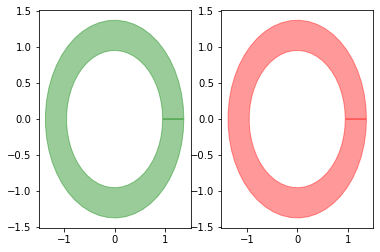

In [16]:
def plot_ring(ax,rmin,rmax,alpha,color):
    n, radii = 50, [rmin,rmax] 
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))
    ys = np.outer(radii, np.sin(theta))
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]

    ax.fill(np.ravel(xs), np.ravel(ys), color=color,alpha=alpha)
    return

fig, ax  = plt.subplots(1,2)
plot_ring(ax[0],rmin,rmax,0.4,'g')
plot_ring(ax[1],rmin,rmax,0.4,'r')
plt.show()

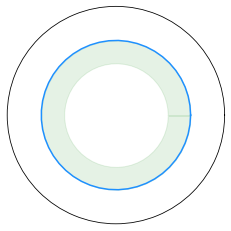

In [17]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})

theta = np.linspace(0, 2*np.pi, 50, endpoint=True)
r1 = rmin*np.ones(len(theta))
r2 = rmax*np.ones(len(theta))

ax.plot(theta, r1,color='DodgerBlue',alpha=0.0)
ax.plot(theta, r2,color='DodgerBlue')
ax.fill_between(theta, r1, r2,color='g',alpha=0.1)
ax.set_yticks([]) #([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_xticks([])
ax.set_rlim(0,2)
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


In [18]:
rmin,rmax

(0.9534625892455924, 1.37360563948689)

In [19]:
## Back to the exoplanets

In [20]:
#Stellar Classification Temperatures from here:
#https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectral_class.html
def get_bolometric_correction(Teff):
    if Teff > 28000: #O Star
        bolo_correct = 0.
        print("O STAR")
    elif ((Teff <= 28000) and (Teff > 10000)): #B Star
        bolo_correct = -2.
    elif ((Teff <= 10000) and (Teff > 7500)): #A Star
        bolo_correct = -0.3
    elif ((Teff <= 7500) and (Teff > 6000)): #F Star
        bolo_correct = -0.15
    elif ((Teff <= 6000) and (Teff > 4900)): #G Star
        bolo_correct = -0.4
    elif ((Teff <= 4900) and (Teff > 3500)): #K Star
        bolo_correct = -0.8
    elif ((Teff <= 3500) and (Teff > 2000)): #M Star
        bolo_correct = -2.
    elif (Teff <= 2000): #L Star
        bolo_correct = 0.
        print("L STAR")
    else:
        print("A MISTAKE HAPPENED")
    return bolo_correct

In [21]:
def compute_stellar_luminosity(mV,Teff,dist): #DIST IN PC! 
    Mbolsun = 4.72
    
    MV = mV - 5*np.log10(dist/10.)
    BC = get_bolometric_correction(Teff)
    Mbol = MV + BC
    exp = (Mbol - Mbolsun)/(-2.5)
    return 10.**exp #stellar luminosity in units of Lsun

In [22]:
compute_stellar_luminosity(-26.74,5700,4.84814e-7)

0.01303617869472232

In [23]:
nans = np.isnan(df['V'])
len(df['V'][~nans]),len(df['V']),float(len(df['V'][~nans]))/len(df['V'])

(1133, 5747, 0.19714633721941882)

In [24]:
nans = np.isnan(df['DIST'])
len(df['DIST'][~nans]),len(df['DIST']),float(len(df['DIST'][~nans]))/len(df['DIST'])

(2351, 5747, 0.40908299982599616)

In [25]:
df2=df.dropna(subset=['V','DIST','TEFF']).reset_index(drop=True)

In [26]:
sun_like = np.where((df2['TEFF'] < 6000.) & (df2['TEFF']>5500.))[0]

In [27]:
Lstar = compute_stellar_luminosity(df2['V'][3],df2['TEFF'][3],df2['DIST'][3])

In [82]:
def calculate_habitable_zone(mV, Teff, dist):
    Lstar = compute_stellar_luminosity(mV,Teff,dist)
    rmin = np.sqrt(Lstar/1.1)
    rmax = np.sqrt(Lstar/0.53)
    return rmin,rmax ## units in AU

def calculate_Sun_habitable_zone():
    rmin = np.sqrt(1./1.1)
    rmax = np.sqrt(1./0.53)
    return rmin,rmax ## units in AU

def add_orbit_to_plot(ax, a, e, color):
    theta = np.linspace(0, 2*np.pi, 2000)#, endpoint=True)
    r = np.sqrt(((a**2)*(1.-e**2))/(1.- ((e**2) * np.cos(theta)**2)))

    ax.plot(theta, r,color=color)
    return

theta = np.linspace(0, 2*np.pi, 2000)#, endpoint=True)
a = 1.2
e = 0.99
r = np.sqrt(((a**2)*(1.-e**2))/(1.- ((e**2) * np.cos(theta)**2)))




NameError: name 'add_HZ_to_plot' is not defined

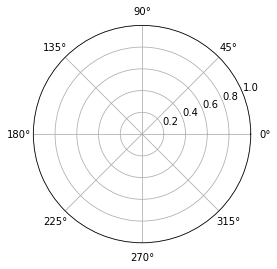

In [29]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})

rSmin,rSmax = calculate_Sun_habitable_zone()
r1,r2 = calculate_habitable_zone(df2['V'][3],df2['TEFF'][3],df2['DIST'][3])
add_HZ_to_plot(ax, r1, r2, 'HotPink', 0.2,edges=False)
add_HZ_to_plot(ax, rSmin, rSmax,'Green',0.2,edges=True)
#ax.set_rlim(0,3)

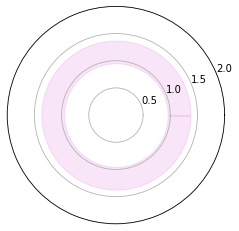

In [30]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})

theta = np.linspace(0, 2*np.pi, 50, endpoint=True)
r1 = rmin*np.ones(len(theta))
r2 = rmax*np.ones(len(theta))

r3 = rSmin*np.ones(len(theta))
r4 = rSmax*np.ones(len(theta))

#ax.plot(theta, r1,color='DodgerBlue',alpha=0.0)
#ax.plot(theta, r2,color='DodgerBlue')
ax.fill_between(theta, r1, r2,color='m',alpha=0.1)

#ax.plot(theta, r3,color='DodgerBlue',alpha=0.0)
#ax.plot(theta, r4,color='DodgerBlue')
#ax.fill_between(theta, r3, r4,color='g',alpha=0.1)
ax.set_yticks([0.5, 1, 1.5, 2, 2.5])  # Less radial ticks
ax.set_xticks([])
ax.set_rlim(0,2)
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

#ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()


In [48]:
hz = np.zeros((len(df2['V']),2))

for i in range(len(df2['V'])):
    hz[i,:] = calculate_habitable_zone(df2['V'][i],df2['TEFF'][i],df2['DIST'][i])


<ipython-input-21-b8e00ee2e257>:4: RuntimeWarning: divide by zero encountered in log10
  MV = mV - 5*np.log10(dist/10.)


In [ ]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
rSmin,rSmax = calculate_Sun_habitable_zone()

for i in range(len(hz[:,0])):
    add_HZ_to_plot(ax, hz[i,0], hz[i,1], 'DodgerBlue', 0.05,edges=False)

#add_HZ_to_plot(ax, rSmin, rSmax,'Green',0.2,edges=True)
ax.set_rlim(0,40)

In [ ]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
rSmin,rSmax = calculate_Sun_habitable_zone()

for i in range(len(hz[:,0])):
    add_HZ_to_plot(ax, hz[i,0], hz[i,1], 'DodgerBlue', 0.01,edges=False)

#add_HZ_to_plot(ax, rSmin, rSmax,'Green',0.2,edges=True)
ax.set_rlim(0,10)

In [46]:
spectral_class = []

#Stellar Classification Temperatures from here:
#https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectral_class.html
def get_spectral_type(Teff):
    if Teff > 28000: #O Star
        return 'O'
    elif ((Teff <= 28000) and (Teff > 10000)): #B Star
        return 'B'
    elif ((Teff <= 10000) and (Teff > 7500)): #A Star
        return 'A'
    elif ((Teff <= 7500) and (Teff > 6000)): #F Star
        return 'F'
    elif ((Teff <= 6000) and (Teff > 4900)): #G Star
        return 'G'
    elif ((Teff <= 4900) and (Teff > 3500)): #K Star
        return 'K'
    elif ((Teff <= 3500) and (Teff > 2000)): #M Star
        return 'M'
    elif (Teff <= 2000): #L Star
        return 'L'
    else:
        print("A MISTAKE HAPPENED")
    return 

for i in range(len(df2['TEFF'])):
    spectral_class.append(get_spectral_type(df2['TEFF'][i]))

In [ ]:
plt.hist(spectral_class)

In [ ]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
rSmin,rSmax = calculate_Sun_habitable_zone()

i = 700
add_HZ_to_plot(ax, hz[i,0], hz[i,1], 'DodgerBlue', 0.1,edges=True)
#add_HZ_to_plot(ax, rSmin, rSmax,'Green',0.2,edges=True)
add_orbit_to_plot(ax, df2['A'][i], df2['ECC'][i], 'Red')
print(df2['A'][i], df2['ECC'][i])
#ax.set_rlim(0,2.5)
#ax.set_yticks([0.5, 1, 1.5, 2, 2.5])  # Less radial ticks
ax.set_xticks([])

In [ ]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
rSmin,rSmax = calculate_Sun_habitable_zone()

i = 700
add_HZ_to_plot(ax, hz[i,0], hz[i,1], 'DodgerBlue', 0.1,edges=True)
#add_HZ_to_plot(ax, rSmin, rSmax,'Green',0.2,edges=True)
add_orbit_to_plot(ax, df2['A'][i], df2['ECC'][i], 'Red')
print(df2['A'][i], df2['ECC'][i])
#ax.set_rlim(0,2.5)
#ax.set_yticks([0.5, 1, 1.5, 2, 2.5])  # Less radial ticks
ax.set_xticks([])

In [ ]:
plt.hist(hz[:,1],range=[0,20],bins=20)
plt.xlim(0,20)

In [79]:
def plot_ring(ax,rmin,rmax,alpha,color):
    #n, radii = 50, [rmin,rmax] 
    #theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    #xs = np.outer(radii, np.cos(theta))
    #ys = np.outer(radii, np.sin(theta))
    #xs[1,:] = xs[1,::-1]
    #ys[1,:] = ys[1,::-1]

    #ax.fill(np.ravel(xs), np.ravel(ys), color=color,alpha=alpha)
    theta = np.linspace(0, 2*np.pi, 50, endpoint=True)
    r1 = rmin*np.ones(len(theta))
    r2 = rmax*np.ones(len(theta))

    #ax.plot(theta, r1,color='DodgerBlue',alpha=0.0)
    #ax.plot(theta, r2,color='DodgerBlue')
    ax.fill_between(theta, r1, r2,color='g',alpha=0.1)
    ax.set_yticks([]) #([0.5, 1, 1.5, 2])  # Less radial ticks
    ax.set_xticks([])
    ax.set_rlim(0,rmax+0.2*rmax)
    
    return

#fig, ax  = plt.subplots(1,2)
#plot_ring(ax[0],rmin,rmax,0.4,'g')
#plot_ring(ax[1],rmin,rmax,0.4,'r')
#plt.show()

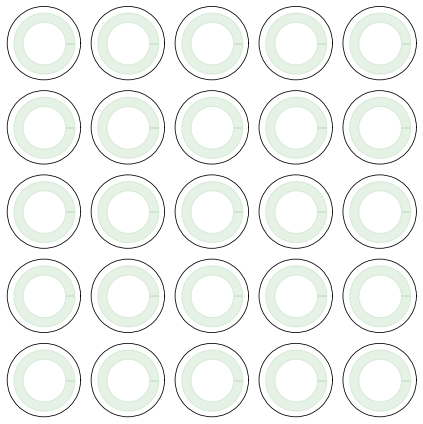

In [80]:
fig, ax = plt.subplots(5,5,subplot_kw={'projection': 'polar'})
ax = ax.flatten()
for i in range(len(ax)):
    #ax[i].set_yticks([]) #([0.5, 1, 1.5, 2])  # Less radial ticks
    #ax[i].set_xticks([])
    #print(hz[i,0],hz[i,1])
    plot_ring(ax[i],hz[i,0],hz[i,1],0.01,'DodgerBlue')

fig.set_size_inches(6,6)
plt.tight_layout()

In [31]:
## Does the definition of the HZ that I'm working with include the effects of of greenhouse gasses or not? 
## Because that could be an interesting thing to show... 

In [51]:
hz[i,0],hz[i,1]

(0.14279505279857674, 0.20571765691420385)

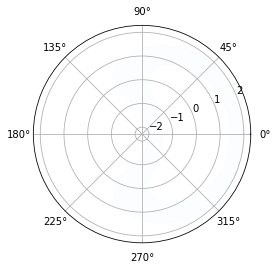

In [56]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
i = 0
plot_ring(ax,hz[i,0],hz[i,1],0.01,'DodgerBlue')

In [ ]:
## Figure out how to find planets in their Habitabele Zone
